# Library

In [ ]:
import pandas as pd # manipulasi tabel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # model decision tree

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Penjelasan Dataset

# Permasalan dan tujuan

# Dataset

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# 2. Preprocessing





## Missing values

In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

menghapus missing values

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Data Duplikat

In [ ]:
df[df.duplicated()]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


 kesimpulan tidak ada data duplikat

## Data imbalance

In [ ]:
df["stroke"].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

<Axes: ylabel='stroke'>

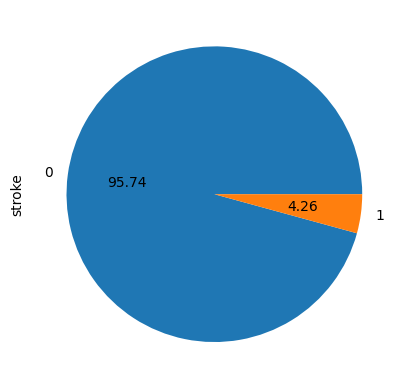

In [ ]:
df["stroke"].value_counts().plot.pie(autopct='%.2f')

## Encoding

In [ ]:
df2 = pd.DataFrame()

In [ ]:
df2["gender"] = df.gender.map({"Male":1, "Female":0})
df2.head()

,gender
0,NaN
2,NaN
3,NaN
4,NaN
5,NaN


In [ ]:
df2["ever_married"] = df.ever_married.map({"Yes":1, "No":0})
df2.head()

,gender,ever_married
0,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN


In [ ]:
df2 = pd.get_dummies(df, columns=['work_type'])

In [ ]:
df2 = pd.get_dummies(df, columns=['residence_type'])

In [ ]:
df2 = pd.get_dummies(df, columns=['smoking_status'])

In [ ]:


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


In [ ]:
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,NaN,67.0,0,1,NaN,Private,Urban,228.69,36.6,1,0,1,0,0
2,31112,NaN,80.0,0,1,NaN,Private,Rural,105.92,32.5,1,0,0,1,0
3,60182,NaN,49.0,0,0,NaN,Private,Urban,171.23,34.4,1,0,0,0,1
4,1665,NaN,79.0,1,0,NaN,Self-employed,Rural,174.12,24.0,1,0,0,1,0
5,56669,NaN,81.0,0,0,NaN,Private,Urban,186.21,29.0,1,0,1,0,0


# Modeling

## Split Data

In [ ]:
X = df.drop(["stroke"], axis=1)
y = df["stroke"]

In [ ]:
X.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,9046,NaN,67.0,0,1,NaN,Private,Urban,228.69,36.6,formerly smoked
2,31112,NaN,80.0,0,1,NaN,Private,Rural,105.92,32.5,never smoked
3,60182,NaN,49.0,0,0,NaN,Private,Urban,171.23,34.4,smokes
4,1665,NaN,79.0,1,0,NaN,Self-employed,Rural,174.12,24.0,never smoked
5,56669,NaN,81.0,0,0,NaN,Private,Urban,186.21,29.0,formerly smoked


In [ ]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("Y_train: ", len(y_train))
print("Y_test: ", len(y_test))

X_train:  3436
X_test:  1473
Y_train:  3436
Y_test:  1473


In [ ]:
X_test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
4336,53802,NaN,80.0,0,1,NaN,Private,Rural,125.32,32.9,Unknown
3709,1454,NaN,42.0,0,0,NaN,Private,Urban,84.03,31.4,never smoked
964,59336,NaN,66.0,1,0,NaN,Private,Rural,74.90,32.1,never smoked
2647,66264,NaN,29.0,0,0,NaN,Govt_job,Urban,102.40,26.9,smokes
3262,14376,NaN,47.0,0,0,NaN,Private,Rural,88.49,22.2,smokes


## Pemanggilan dan Training Data

In [ ]:
model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5
    )

In [ ]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'children'